## This will be my playground for implementing some interesting code.

I will implement a multiple linear classifier first for cifar dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


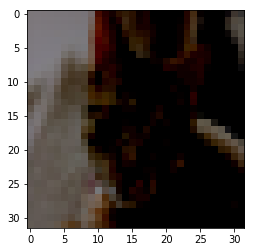

In [73]:
plt.imshow(X_test[103,:].astype(int).reshape(32, 32, 3))
X_test[93,:].astype(int)
test=X_test[103,:]

In [82]:
test_zeromean=test-np.mean(test)
test_univar=test_zeromean/np.std(test_zeromean)
test_vec=test_univar[:,None]

In [99]:
test_vec.T.dot(test_vec)

array([[3072.]])

In [101]:

cov = test_vec.T.dot(test_vec) / test_vec.shape[0]
U,S,V = np.linalg.svd(cov)

p_result=test_vec.dot(U)

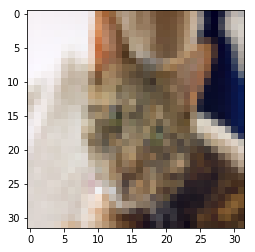

In [102]:
pimg=(p_result-min(p_result))/(max(p_result)-min(p_result))
plt.imshow(pimg.reshape(32, 32, 3))

In [11]:
def L_i_vectorized(x,y,W):
    scores=W.dot(x)
    margins=np.maximum(0,scores-scores[y]+1)
    margins[y]=0
    return loss_i

(3072,)

In [82]:
import numpy as np

class target_f():
    
    def __init__(self,theta1, theta2, a=10, b=1):
        self.theta1=theta1
        self.theta2=theta2
        self.a=a
        self.b=b
    
    def t_f(self):
        theta1=self.theta1
        theta2=self.theta2
        a=self.a
        b=self.b
        return a*(theta2-theta1**2)**2 + (b-theta1)**2
    
    def g_f(self):
        theta1=self.theta1
        theta2=self.theta2
        a=self.a
        b=self.b
        ret=np.zeros(2)
        ret[0]=2*a*(theta2-theta1**2)*(-2*theta1)-2*(b-theta1)
        ret[1]=2*a*(theta2-theta1**2)
        
        return ret
    
    def h_f(self):
        theta1=self.theta1
        theta2=self.theta2
        a=self.a
        b=self.b
        ret=np.zeros([2,2])
        
        ret[0,0]=4*a*3*theta1**2+2-4*a*theta2
        ret[0,1]=-4*a*theta1
        ret[1,0]=-4*a*theta1
        ret[1,1]=2*a
        
        return ret
    
    

        

In [83]:
m=target_f(-0.5,0.5)


In [84]:
print(m.t_f())
print(m.g_f())
print(m.h_f())


2.875
[2. 5.]
[[12. 20.]
 [20. 20.]]


In [87]:
a=1
vec=np.array([-0.5,0.5])
    
while(a):
    m=target_f(*vec)
    inv_m=np.linalg.inv(m.h_f())
    g=m.g_f()
    delta=-inv_m.dot(g)
    a=abs(g)>1e-8*(abs(m.h_f())+0.01)
    a=np.linalg.norm(a)
    print(a)
    vec+=delta
    print(vec)
    
    


2.0
[-0.875  0.625]
2.0
[-0.38319672 -0.09503074]
2.0
[-0.14624285 -0.03476016]
2.0
[ 0.39368827 -0.13653516]
2.0
[0.48245346 0.22488208]
2.0
[0.929545   0.66416306]
2.0
[0.94364216 0.89026179]
2.0
[0.99977689 0.99640272]
2.0
[0.99998677 0.9999735 ]
2.0
[1. 1.]
0.0
[1. 1.]


In [94]:
cnt=0
vec=np.array([-0.5,0.5])
vec_prev=np.array([0,0])
B=0.1*np.ones([2,2])
B_prev=B
n=B.shape[0]
a=1
while(a):
    m=target_f(*vec)
    g=m.g_f()
    g_prev=target_f(*vec_prev).g_f()
    
    y_k=g-g_prev
    s_k=vec-vec_prev
    print(y_k)
    B=(np.ones([n,n])-(s_k.dot(y_k.T))/(y_k.T.dot(s_k)))*B_prev*(np.ones([n,n])-y_k.dot(s_k)/y_k.T.dot(s_k))
    B+=s_k.dot(s_k.T)/y_k.T.dot(s_k)
    print(B)
    B_prev=B
    vec_prev=vec
    delta=-B*g
    print(delta)
    vec+=delta
    

[4. 5.]
[[1. 1.]
 [1. 1.]]
[[-2. -5.]
 [-2. -5.]]


ValueError: non-broadcastable output operand with shape (2,) doesn't match the broadcast shape (2,2)

[2. 5.]
[ 0.09375 -0.15625]
[-0.5  0.5]
